In [1]:
import requests
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

/Users/edwardamoah/Documents/GitHub/FloralArea/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
files = os.listdir('/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1')

In [3]:
files = ['/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/' + file for file in files]

In [7]:
area = []
mask = []
filesnames = []
for file in files:
    try:
        print(file)
        url = 'http://localhost:8000/estimate_area/flower/0.25'
        file = {'uploaded_file': open(file, 'rb')}
        response = requests.post(url, files=file)
        response = response.json()
        area.append(response['area'])
        mask.append(response['mask'])
        filesnames.append(file)
    except:
        area.append(np.nan)
        mask.append(np.nan)
        filesnames.append(file)
    
    #print(response.json())

/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_172530114_80cm_F6_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_173554009_80cm_F11_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_175708911_100cm_F23_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_175352365_100cm_F21_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_174000188_80cm_F13_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_175405036_80cm_F21_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_20240214_175033319_60cm_F18_.jpg
/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/evaluation_images_experiment_1/PXL_

In [11]:
filename= [file.split('/')[-1] for file in files]
df = pd.DataFrame({'area': area, 'mask': mask, 'images': filename})

In [14]:
df.dropna(inplace=True)

In [15]:
df1 = pd.read_csv('/Users/edwardamoah/Documents/GitHub/FloralArea/research/data/floralarea_experiment_1 - floralarea.csv')

In [16]:
df2 = df1[['images', 'flower_number','distance', 'flower_color','imagej_area', 'morphology']].merge(df, on='images')

In [18]:
df2.to_csv('/Users/edwardamoah/Documents/GitHub/FloralArea/research/Evaluation/floralarea_25.csv', index=False)

In [43]:
def getFlowerNumber(filename):
    return filename.split('_')[-2]

In [45]:
df['flower_number'] = df['images'].apply(lambda x: getFlowerNumber(x))

In [51]:
def getDistance(filename):
    return filename.split('_')[-3]

In [52]:
df['distance'] = df['images'].apply(lambda x: getDistance(x))

In [61]:
df.groupby(['flower_number', "distance"])["area"].mean()

flower_number  distance
F1             100cm        5.291555
               60cm         7.493321
               80cm         5.877161
F10            100cm        3.009569
               60cm         3.874344
                             ...    
F8             60cm         1.102041
               80cm         0.939385
F9             100cm        8.136929
               60cm        10.905120
               80cm         9.733239
Name: area, Length: 65, dtype: float64

Text(0.5, 1.0, 'Standard Deviation of Floral Area from different distance')

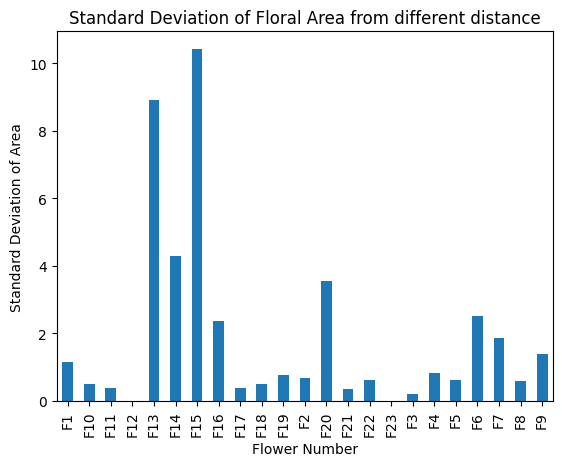

In [74]:
df.groupby(['flower_number'])["area"].std().plot(kind='bar')
plt.xlabel('Flower Number')
plt.ylabel('Standard Deviation of Area')
plt.title('Standard Deviation of Floral Area from different distance')

In [72]:
np.mean(area_std_list)

1.9490675690307795